# Assignment one

In [32]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [33]:
%matplotlib inline

In [34]:
%sql postgresql://appdev@data/appdev

'Connected: appdev@appdev'

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
engine = create_engine('postgresql://appdev@data/appdev', echo=True)

### Ass. 1.A

In [26]:
%sql select * from geonames order by population DESC limit 5;

5 rows affected.


geonameid,name,longitude,latitude,feature_class,feature_code,country_code,admin1_code,admin2_code,population,elevation,timezone
305104,Levant,36.0,34.0,L,RGN,None,None,None,44990000,None,Asia/Beirut
1227603,Democratic Socialist Republic of Sri Lanka,80.75,7.75,A,PCLI,LK,00,None,21513990,None,Asia/Colombo
3451189,Rio de Janeiro,-42.5,-22.25,A,ADM1,BR,21,None,15993583,None,America/Sao_Paulo
7671048,Rangpur Division,89.0,25.83333,A,ADM1,BD,87,None,15787758,None,Asia/Dhaka
1522867,Republic of Kazakhstan,68.0,48.0,A,PCLI,KZ,00,None,15340000,None,None


In [28]:
%%sql
CREATE OR REPLACE FUNCTION public.geodistance(alat double precision, alng double precision, blat double precision, blng double precision)
  RETURNS double precision AS
$BODY$
SELECT asin(
  sqrt(
    sin(radians($3-$1)/2)^2 +
    sin(radians($4-$2)/2)^2 *
    cos(radians($1)) *
    cos(radians($3))
  )
) * 7926.3352 AS distance;
$BODY$
  LANGUAGE sql IMMUTABLE
  COST 100;

Done.


[]

### Ass. 1.B

In [29]:
%%sql
SELECT geonameid, name, timezone, longitude, latitude, (Point(36.0,34.0) <-> Point(longitude, latitude)) as "distance" 
FROM geonames
ORDER BY distance DESC
LIMIT 5;

100 rows affected.


geonameid,name,timezone,longitude,latitude,distance
6621809,Eckins Nunatak,Antarctica/McMurdo,-175.85,-85.11667,243.041567580299
4032922,Nairn River,Pacific/Chatham,-176.55,-43.95,226.392811281631
4032814,Waikato,Pacific/Chatham,-176.51667,-43.83333,226.321369487677
6631575,Cox Peaks,Antarctica/McMurdo,-153.5,-86.05,224.32621893127
4035858,Tuvumatha,Pacific/Fiji,-179.9,-16.75,221.784518170228
4035919,Savusavu,Pacific/Fiji,-179.86667,-16.86667,221.778802715178
4035832,Vaua Creek,Pacific/Fiji,-179.85,-16.73333,221.732030326899
6635223,"Howe, Mount",Antarctica/McMurdo,-149.5,-87.36667,221.675705901411
11619167,Muaidakewa Point,Pacific/Fiji,-178.70644,-20.65741,221.554254857319
6630087,Breckinridge Peak,Antarctica/McMurdo,-155.11667,-78.06667,221.550265350276


### Ass 1.C

In [30]:
%%sql
SELECT geonameid, name, timezone, longitude, latitude, (public.geodistance(36.0,34.0, longitude, latitude)) as "distance" 
FROM geonames
ORDER BY distance DESC
LIMIT 5;

100 rows affected.


geonameid,name,timezone,longitude,latitude,distance
5853899,Umauma Stream,Pacific/Honolulu,-155.13524,19.90753,11313.0260956277
5852677,Puhi Bay,Pacific/Honolulu,-155.04908,19.73615,11309.7736571807
5851813,Opihilala Gulch,Pacific/Honolulu,-155.38052,20.0416,11306.5728052314
5851923,Pahoa Landing Strip,Pacific/Honolulu,-154.96528,19.51944,11304.2933217351
5852455,Pōhakuloa Harbor,Pacific/Honolulu,-155.99359,20.70618,11303.0526227147
5849556,Koholālele,Pacific/Honolulu,-155.38667,19.95667,11302.5977096061
5847771,Kalapana Sea View Estates,Pacific/Honolulu,-154.92339,19.40743,11301.3404404286
5850847,Manuwaikaalio Gulch,Pacific/Honolulu,-155.62149,20.14169,11298.6532196036
5851256,Mud Lane,Pacific/Honolulu,-155.58194,20.08306,11298.1639034559
5855416,Halehaku Gulch,Pacific/Honolulu,-156.26713,20.90625,11296.7562857781


In [37]:
result = %sql select latitude, longitude, population FROM geonames order by population desc LIMIT 1000;

1000 rows affected.


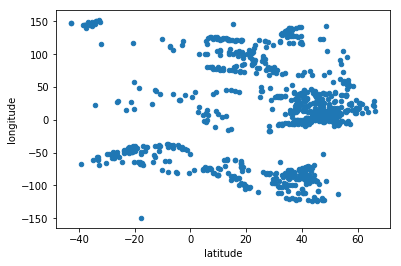

In [38]:
df = pd.DataFrame(result, columns=['latitude', 'longitude','population'])
df.plot.scatter(x='latitude', y='longitude')

# Assignment two

### Ass. 2.A

In [55]:
%sql SELECT data FROM cards WHERE data @> '{"artist":"Rob Alexander"}';

401 rows affected.


data
"{'id': '4a7bf234af44e07d9a159d4d89e96ce320919917', 'cmc': 6, 'name': 'Beacon of Immortality', 'text': ""Double target player's life total. Shuffle Beacon of Immortality into its owner's library."", 'type': 'Instant', 'types': ['Instant'], 'artist': 'Rob Alexander', 'colors': ['White'], 'flavor': 'The cave floods with light. A thousand rays shine forth and meld into one.', 'layout': 'normal', 'number': '10', 'rarity': 'Rare', 'manaCost': '{5}{W}', 'imageName': 'beacon of immortality', 'mciNumber': '10', 'multiverseid': 130553, 'colorIdentity': ['W']}"
"{'id': '9cea331c080c3bbc7987c6560f65e39e9d1ed34f', 'cmc': 5, 'name': 'Kavu Climber', 'text': 'When Kavu Climber enters the battlefield, draw a card.', 'type': 'Creature — Kavu', 'power': '3', 'types': ['Creature'], 'artist': 'Rob Alexander', 'colors': ['Green'], 'flavor': '""There was a crack of branches, a rustle of leaves, then a tremendous roar. Our party had no chance as death descended from above.""\n—Taseen, elvish bard', 'layout': 'normal', 'number': '273', 'rarity': 'Common', 'manaCost': '{3}{G}{G}', 'subtypes': ['Kavu'], 'imageName': 'kavu climber', 'mciNumber': '273', 'toughness': '3', 'multiverseid': 129511, 'colorIdentity': ['G']}"
"{'id': '28cc7c79cca8939fd9661f7abfc6ca453715b75e', 'cmc': 0, 'name': 'Llanowar Wastes', 'text': '{T}: Add {C} to your mana pool.\n{T}: Add {B} or {G} to your mana pool. Llanowar Wastes deals 1 damage to you.', 'type': 'Land', 'types': ['Land'], 'artist': 'Rob Alexander', 'layout': 'normal', 'number': '355', 'rarity': 'Rare', 'imageName': 'llanowar wastes', 'mciNumber': '355', 'multiverseid': 129627, 'colorIdentity': ['B', 'G']}"
"{'id': '7a90b7ba6197f8774ed99ecf75ac9abb3e0c0f20', 'cmc': 0, 'name': 'Shivan Reef', 'text': '{T}: Add {C} to your mana pool.\n{T}: Add {U} or {R} to your mana pool. Shivan Reef deals 1 damage to you.', 'type': 'Land', 'types': ['Land'], 'artist': 'Rob Alexander', 'layout': 'normal', 'number': '357', 'rarity': 'Rare', 'imageName': 'shivan reef', 'mciNumber': '357', 'multiverseid': 129731, 'colorIdentity': ['U', 'R']}"
"{'id': '8d1035f151615c949d0645b70fe01d8ab4a3f796', 'cmc': 0, 'name': 'Sulfurous Springs', 'text': '{T}: Add {C} to your mana pool.\n{T}: Add {B} or {R} to your mana pool. Sulfurous Springs deals 1 damage to you.', 'type': 'Land', 'types': ['Land'], 'artist': 'Rob Alexander', 'layout': 'normal', 'number': '359', 'rarity': 'Rare', 'imageName': 'sulfurous springs', 'mciNumber': '359', 'multiverseid': 129751, 'colorIdentity': ['B', 'R']}"
"{'id': 'c97103ab834aad9b3fb7d07c4fb563089f97fe87', 'cmc': 0, 'name': 'Treetop Village', 'text': ""Treetop Village enters the battlefield tapped.\n{T}: Add {G} to your mana pool.\n{1}{G}: Treetop Village becomes a 3/3 green Ape creature with trample until end of turn. It's still a land. (If it would assign enough damage to its blockers to destroy them, you may have it assign the rest of its damage to defending player or planeswalker.)"", 'type': 'Land', 'types': ['Land'], 'artist': 'Rob Alexander', 'layout': 'normal', 'number': '361', 'rarity': 'Uncommon', 'imageName': 'treetop village', 'mciNumber': '361', 'multiverseid': 106455, 'colorIdentity': ['G']}"
"{'id': '24a47bf9cb4596246501294e7127bf74e082bc1d', 'cmc': 0, 'name': 'Plains', 'type': 'Basic Land — Plains', 'types': ['Land'], 'artist': 'Rob Alexander', 'layout': 'normal', 'number': '364', 'rarity': 'Basic Land', 'subtypes': ['Plains'], 'imageName': 'plains1', 'watermark': 'White', 'supertypes': ['Basic'], 'variations': [129682, 129683, 129681], 'multiverseid': 129680, 'colorIdentity': ['W']}"
"{'id': 'be5e30798e4f8b9b6f6e6a8dd2e30bf86bb04b94', 'cmc': 0, 'name': 'Forest', 'type': 'Basic Land — Forest', 'types': ['Land'], 'artist': 'Rob Alexander', 'layout': 'normal', 'number': '382', 'rarity': 'Basic Land', 'subtypes': ['Forest'], 'imageName': 'forest3', 'watermark': 'Green', 'supertypes': ['Basic'], 'variations': [129559, 129562, 129560], 'multiverseid': 129561, 'colorIdentity': ['G']}"
"{'id': '4c3d9f2b708

### Ass 2.B

In [58]:
%%sql SELECT data FROM cards 
WHERE data @> '{"subtypes":["Human"]}'
limit 5;

10 rows affected.


data
"{'id': 'ab1ab474019e4e76c66e2b524d354cb7c3212616', 'cmc': 7, 'name': ""Ancestor's Chosen"", 'text': ""First strike (This creature deals combat damage before creatures without first strike.)\nWhen Ancestor's Chosen enters the battlefield, you gain 1 life for each card in your graveyard."", 'type': 'Creature — Human Cleric', 'power': '4', 'types': ['Creature'], 'artist': 'Pete Venters', 'colors': ['White'], 'flavor': '""The will of all, by my hand done.""', 'layout': 'normal', 'number': '1', 'rarity': 'Uncommon', 'manaCost': '{5}{W}{W}', 'subtypes': ['Human', 'Cleric'], 'imageName': ""ancestor's chosen"", 'mciNumber': '1', 'toughness': '4', 'multiverseid': 130550, 'colorIdentity': ['W']}"
"{'id': 'd3488c0a916bd922856473155a8b49ec23fc2217', 'cmc': 4, 'name': 'Ballista Squad', 'text': '{X}{W}, {T}: Ballista Squad deals X damage to target attacking or blocking creature.', 'type': 'Creature — Human Rebel', 'power': '2', 'types': ['Creature'], 'artist': 'Matthew D. Wilson', 'colors': ['White'], 'flavor': 'The perfect antidote for a tightly packed formation.', 'layout': 'normal', 'number': '8', 'rarity': 'Uncommon', 'manaCost': '{3}{W}', 'subtypes': ['Human', 'Rebel'], 'imageName': 'ballista squad', 'mciNumber': '8', 'toughness': '2', 'multiverseid': 129477, 'colorIdentity': ['W']}"
"{'id': '29c46fca29e5de01dba3bbf05393325bc9132735', 'cmc': 3, 'name': 'Benalish Knight', 'text': 'Flash (You may cast this spell any time you could cast an instant.)\nFirst strike (This creature deals combat damage before creatures without first strike.)', 'type': 'Creature — Human Knight', 'power': '2', 'types': ['Creature'], 'artist': 'Zoltan Boros & Gabor Szikszai', 'colors': ['White'], 'flavor': '""We called them \'armored lightning.\'""\n—Gerrard of the Weatherlight', 'layout': 'normal', 'number': '11', 'rarity': 'Common', 'manaCost': '{2}{W}', 'subtypes': ['Human', 'Knight'], 'imageName': 'benalish knight', 'mciNumber': '11', 'toughness': '2', 'multiverseid': 136279, 'colorIdentity': ['W']}"
"{'id': 'e8b8dea65daf4e9070cce5de62bdbea0bf36d47c', 'cmc': 4, 'name': 'Cho-Manno, Revolutionary', 'text': 'Prevent all damage that would be dealt to Cho-Manno, Revolutionary.', 'type': 'Legendary Creature — Human Rebel', 'power': '2', 'types': ['Creature'], 'artist': 'Steven Belledin', 'colors': ['White'], 'flavor': '""Mercadia\'s masks can no longer hide the truth. Our day has come at last.""', 'layout': 'normal', 'number': '12', 'rarity': 'Rare', 'manaCost': '{2}{W}{W}', 'subtypes': ['Human', 'Rebel'], 'imageName': 'cho-manno, revolutionary', 'mciNumber': '12', 'toughness': '2', 'supertypes': ['Legendary'], 'multiverseid': 130554, 'colorIdentity': ['W']}"
"{'id': '80a6b907fc380ed97615e8abc0fe6071c4ceef67', 'cmc': 3, 'name': 'Field Marshal', 'text': 'Other Soldier creatures get +1/+1 and have first strike. (They deal combat damage before creatures without first strike.)', 'type': 'Creature — Human Soldier', 'power': '2', 'types': ['Creature'], 'artist': 'Stephen Tappin', 'colors': ['White'], 'flavor': 'He is the only one who sees the patterns in the overlapping maps and conflicting reports.', 'layout': 'normal', 'number': '15', 'rarity': 'Rare', 'manaCost': '{1}{W}{W}', 'subtypes': ['Human', 'Soldier'], 'imageName': 'field marshal', 'mciNumber': '15', 'toughness': '2', 'multiverseid': 135258, 'colorIdentity': ['W']}"
"{'id': '7879b835a2c3d6516515d03bd3a3894dceee1812', 'cmc': 1, 'name': 'Honor Guard', 'text': '{W}: Honor Guard gets +0/+1 until end of turn.', 'type': 'Creature — Human Soldier', 'power': '1', 'types': ['Creature'], 'artist': 'Dan Dos Santos', 'colors': ['White'], 'flavor': 'The strength of one. The courage of ten.', 'layout': 'normal', 'number': '23', 'rarity': 'Common', 'manaCost': '{W}', 'subtypes': ['Human', 'Soldier'], 'imageName': 'honor guard', 'mciNumber': '23', 'toughness': '1', 'multiverseid': 129595, 'colorIdentity': ['W']}"
"{'id': '55932565b6905650e67e784b7cf0df63990e9851', 'cmc': 1, 'name': 'Icatian Priest', 'text': '{1}{W}{W}: T

### Ass 2.C

In [72]:
%%sql SELECT count(*),data ->> 'colors' as colors FROM cards 
group by data ->> 'colors'
order by count desc

32 rows affected.


count,colors
7391,None
4977,"[""Green""]"
4877,"[""Black""]"
4858,"[""Red""]"
4755,"[""White""]"
4680,"[""Blue""]"
276,"[""White"", ""Green""]"
273,"[""Red"", ""Green""]"
260,"[""Blue"", ""Black""]"
258,"[""Black"", ""Red""]"


In [73]:
result2 = %sql SELECT count(*),data ->> 'colors' as colors FROM cards group by data ->> 'colors';

32 rows affected.


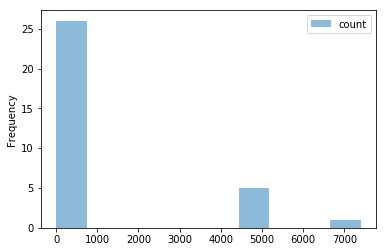

In [74]:
df1= pd.DataFrame(result2, columns=['count', 'colors'])
plt.figure();
df1.plot.hist(alpha=0.5)